# Imports

In [29]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Set Paths

In [30]:
# Define the project path and a list of 5 ABF file names
project_path = 'C:\\Users\\ikmor\\OneDrive\\Documents\\SNR AND OBR pilot study\\'


# Load Data

In [31]:
# Define the file paths
file_paths = [
    f'{project_path}PTX8R3APPLIED IV2.abf',
    f'{project_path}PTX7L2APPLIED IV2.abf',
    f'{project_path}PTX09R5APPLIED IV2.abf',
    f'{project_path}PTX6L2APPLIED IV2.abf']





Input Resistance for C:\Users\ikmor\OneDrive\Documents\SNR AND OBR pilot study\PTX8R3APPLIED IV2.abf: 9.86e+07 Ω (98.63 MΩ)
Input Resistance for C:\Users\ikmor\OneDrive\Documents\SNR AND OBR pilot study\PTX7L2APPLIED IV2.abf: 6.86e+07 Ω (68.59 MΩ)
Input Resistance for C:\Users\ikmor\OneDrive\Documents\SNR AND OBR pilot study\PTX09R5APPLIED IV2.abf: 4.94e+07 Ω (49.39 MΩ)
Input Resistance for C:\Users\ikmor\OneDrive\Documents\SNR AND OBR pilot study\PTX6L2APPLIED IV2.abf: 1.65e+08 Ω (165.27 MΩ)

Mean Input Resistance: 9.55e+07 Ω (95.47 MΩ)




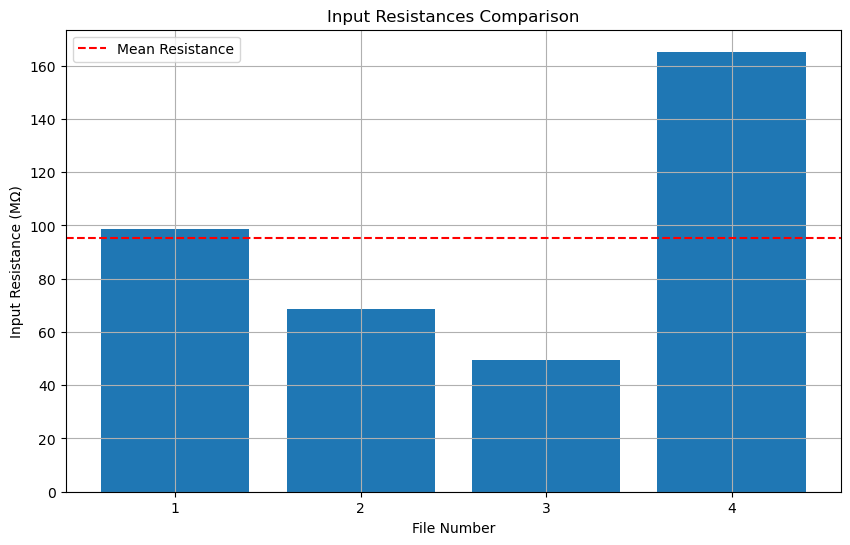

In [32]:
def calculate_input_resistance(file_path):
    abf = pyabf.ABF(file_path)
    sweep_numbers = range(20)
    current_levels = np.array([-50, 45, -45, 40, -40, 35, -35, 30, -30, 25, -25, 20, -20, 15, -15, 10, -10, 5, -5, 0])
    
    start_time, end_time = 0.58, 0.6
    baseline_start, baseline_end = 0.05, 0.15
    
    avg_voltages = []
    
    abf.setSweep(sweep_numbers[0], channel=0)
    times = abf.sweepX
    voltage = abf.sweepY
    baseline_start_index = np.argmin(np.abs(times - baseline_start))
    baseline_end_index = np.argmin(np.abs(times - baseline_end))
    baseline_voltage = np.mean(voltage[baseline_start_index:baseline_end_index])
    
    for sweep in sweep_numbers:
        abf.setSweep(sweep, channel=0)
        voltage = abf.sweepY
        times = abf.sweepX
        start_index = np.argmin(np.abs(times - start_time))
        end_index = np.argmin(np.abs(times - end_time))
        segment_voltage = voltage[start_index:end_index]
        segment_voltage_corrected = segment_voltage - baseline_voltage
        avg_voltage = np.mean(segment_voltage_corrected)
        avg_voltages.append(avg_voltage)
    
    avg_voltages_V = np.array(avg_voltages) * 1e-3
    avg_currents_A = current_levels * 1e-12
    
    slope, _, _, _, _ = stats.linregress(avg_currents_A, avg_voltages_V)
    input_resistance = slope
    
    return input_resistance


# Calculate input resistances for all files
input_resistances = []
for file_path in file_paths:
    input_resistance = calculate_input_resistance(file_path)
    input_resistances.append(input_resistance)
    print(f"Input Resistance for {file_path}: {input_resistance:.2e} Ω ({input_resistance * 1e-6:.2f} MΩ)")
    
# Calculate and print mean input resistance
mean_resistance = np.mean(input_resistances)
print(f"\nMean Input Resistance: {mean_resistance:.2e} Ω ({mean_resistance * 1e-6:.2f} MΩ)")

# Compare input resistances
for i, resistance in enumerate(input_resistances):
    difference = abs(resistance - mean_resistance) / mean_resistance * 100
    if difference > 30:
        print(f"\nWarning: Input resistance for file {i+1} differs by {difference:.2f}% from the mean.")

# Plot input resistances
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5), [r * 1e-6 for r in input_resistances])
plt.xlabel('File Number')
plt.ylabel('Input Resistance (MΩ)')
plt.title('Input Resistances Comparison')
plt.xticks(range(1, 5))
plt.grid(True)

# Add mean resistance line to the plot
plt.axhline(y=mean_resistance * 1e-6, color='r', linestyle='--', label='Mean Resistance')
plt.legend()

plt.show()